# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> Nos Estados Unidos, o seguro de saúde é essencial para garantir o acesso a cuidados de saúde de qualidade num sistema com elevados custos médicos. Sem seguro, muitos americanos lutam para pagar consultas, cuidados e tratamentos, o que pode dificultar os cuidados e agravar os problemas de saúde. Além disso, o seguro saúde oferece proteção financeira contra despesas médicas inesperadas, como emergências e cirurgias, que podem resultar em dívidas. Portanto, um seguro adequado é fundamental para o bem-estar dos americanos e para a estabilidade econômica das famílias.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é prever o custo de seguros de saúde.   Para isso vamos utilizar uma técnica de machine learning chamada regressão linear.</p>

#### __Fonte dos dados__: https://www.kaggle.com/datasets/mirichoi0218/insurance/data

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>age</b> -  Idade do beneficiário principal.</li>
    <li><b>sex</b> - Gênero do contratante do seguro: feminino ou masculino.</li>
    <li><b>bmi</b> - Índice de massa corporal (IMC). </li>
    <li><b>children</b> - Número de filhos cobertos por seguro de saúde / número de dependentes
 </li>
    <li><b>smoker</b> - Fumante ou não fumante </li>
    <li><b>region</b> -  a área residencial do beneficiário nos EUA: nordeste, sudeste, sudoeste, noroeste. </li>
    <li><b>charges</b> - Despesas médicas individuais cobradas pelo seguro de saúde. </li>    
</ul>



## Importando as bibliotecas e visualizando o dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import scipy.stats as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor 
import lightgbm as lgb
from catboost.core import CatBoostRegressor

In [2]:
dados = pd.read_csv('insurance.csv')

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dados.shape

(1338, 7)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Vemos que possuimos 3 variáveis categóricas: sex, smoker e region que precisaremos trasnformar em númericas. </p>

# <font color='red' style='font-size: 30px;'>Análises preliminares</font>
<hr style='border: 2px solid red;'>

Antes de começar as análises preliminares, vamos transformar as variáveis categóricas nominais em variáveis numéricas. Para isos vamos utilzar o get_dummies e o LabelEncoder

In [5]:
label_encoder = LabelEncoder()

dados = pd.get_dummies(dados, columns=['region'], prefix='region', dtype=int)
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
dados['sex'] = label_encoder.fit_transform(dados['sex'])

dados.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Estatísticas descritivas

In [6]:
dados.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## Análises gráficas

In [7]:
## Configurações de formatação do gráfico
sns.set_palette('Accent')
sns.set_style('white')

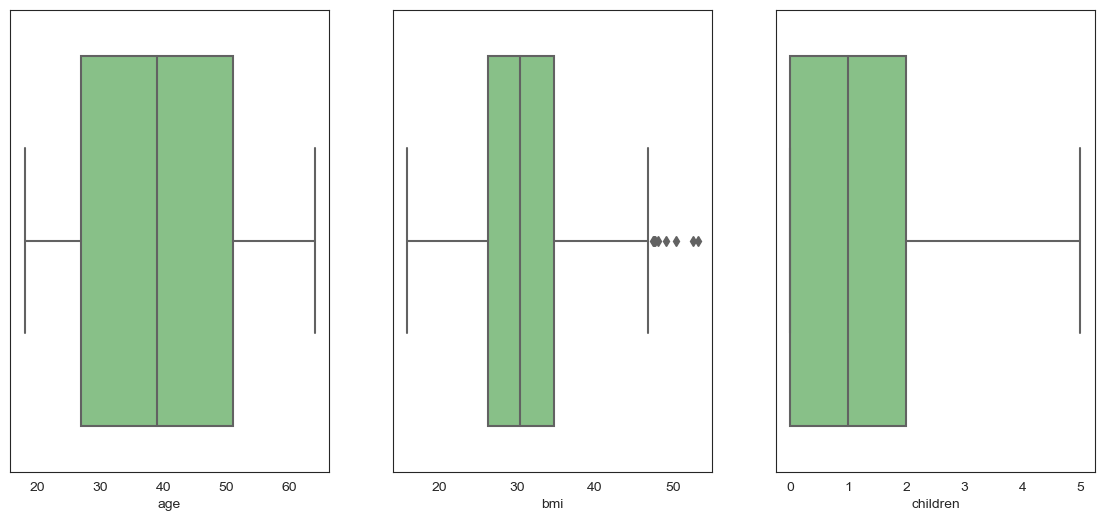

In [8]:
num_cols = ['age', 'bmi', 'children']

fig, axs =  plt.subplots(nrows = 1, ncols = 3, figsize=(14,6))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[:]):
    plt.sca(axs[i])
    sns.boxplot(data=dados, x=col)
    
plt.show()

Vemos uma grande quantidade de candidatos a outliers, entretanto, por se tratarem valores possíveis iremos manter todos eles.

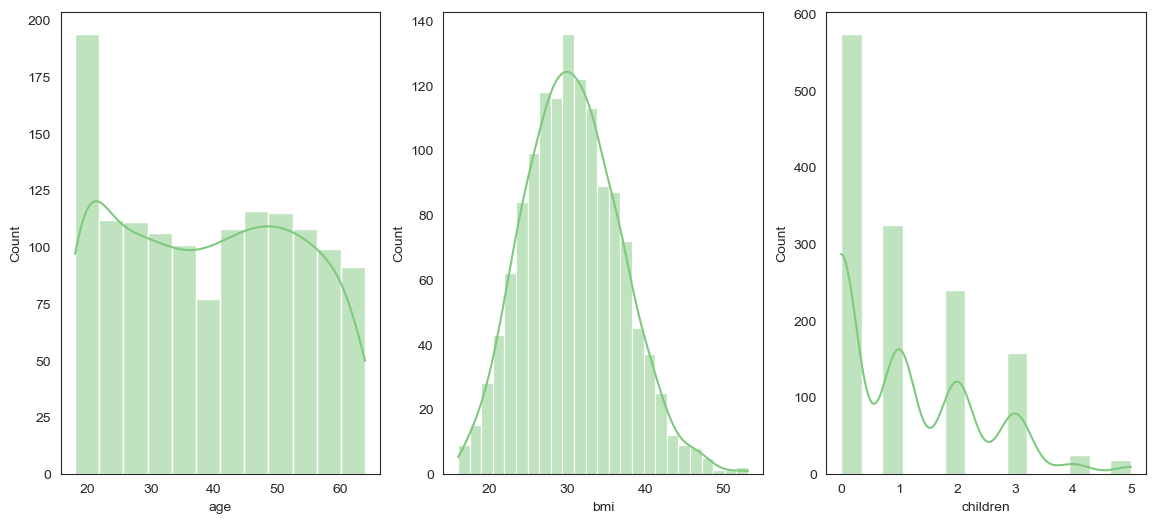

In [9]:
num_cols = ['age', 'bmi', 'children']

fig, axs =  plt.subplots(nrows = 1, ncols = 3, figsize=(14,6))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[:]):
    plt.sca(axs[i])
    sns.histplot(data = dados, x = col, kde = True)
    
plt.show()

## Análises gráficas variável independente

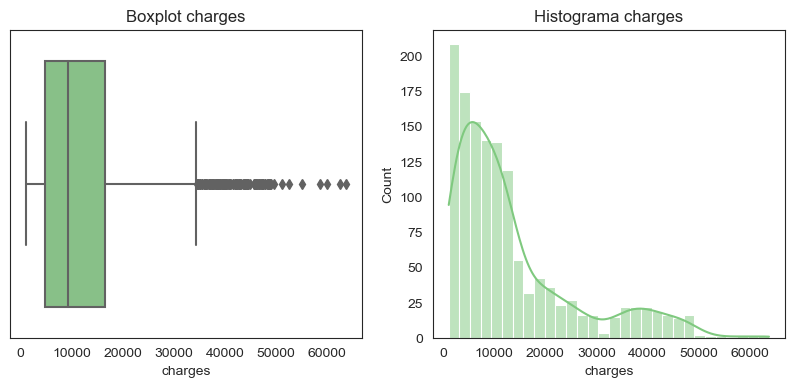

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.boxplot(data = dados, x = 'charges', ax = ax[0])
ax[0].set_title('Boxplot charges')    
sns.histplot(data = dados, x = 'charges', kde = True, ax = ax[1])
ax[1].set_title('Histograma charges')    

plt.show()

Com relação ao boxplot vemos uma grande quantidade de candidatos a outliers, entretanto, por se tratarem valores possíveis iremos manter todos eles.

Pelo histograma a variável dependente (charges) está longe de ser uma distribuição normal, isso será verificado com mais rigor a seguir. De todo modo, uma possível abordagem para esse caso é realizar uma transformação logaritmica nos dados. Antes de decidir a abordagem que será utilizada vamos prosseguir com as análises gráficas.

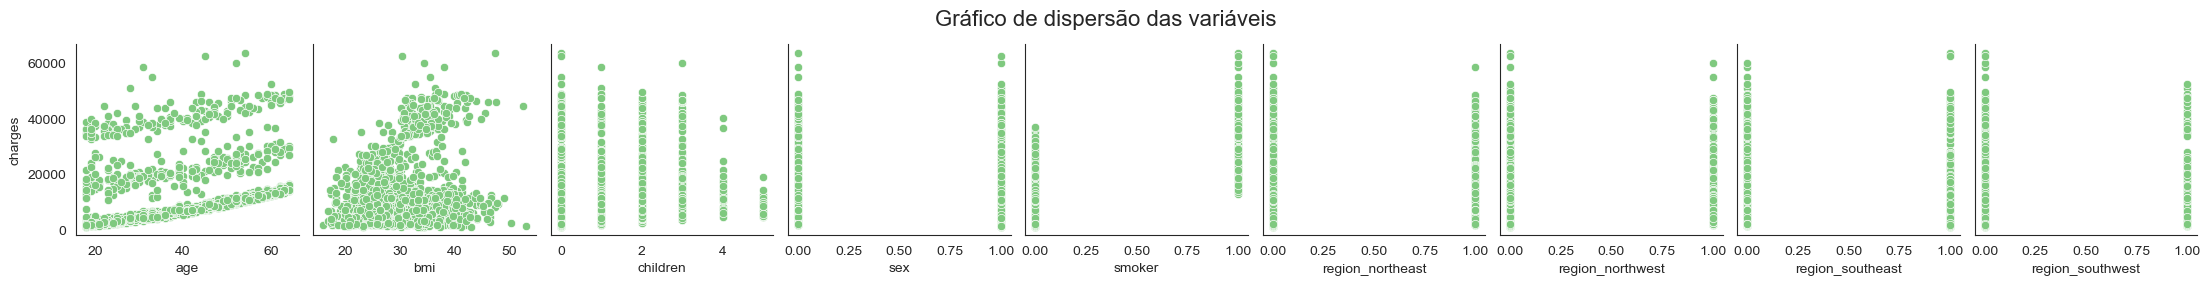

In [11]:
ax = sns.pairplot(data = dados, y_vars = 'charges', x_vars = ['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], height = 2.5)
ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize = 16, y = 1.1)
plt.show()

Vemos uma relação linear mais clara na variável smoker. Bmi e children tem dados muito dispersos e é difícil ver uma relação linear. Já para age podemos ver uma relação linear mais forte que para o caso do bmi. As variáveis sex e todas as relacionadas a region não parecem ser uma relação linear com a variável dependente. Para analisar essas questões com maior profundidade vamos estudar a matriz de correlação entre as variáveis.

## Verificando a normalidade e a correlação

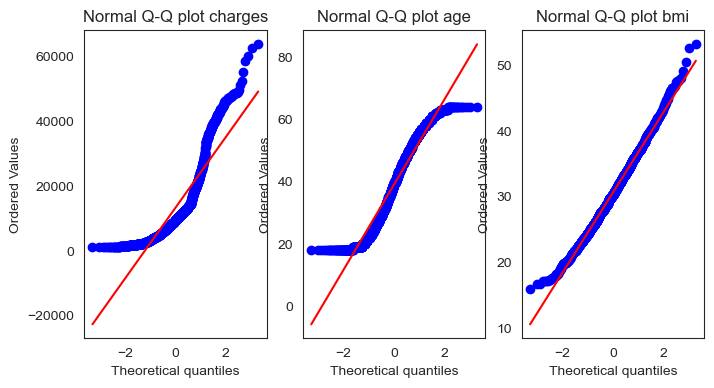

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (8, 4))

_,(_,_,r)= sp.probplot(dados['charges'], fit=True, plot=ax[0])
_,(_,_,r)= sp.probplot(dados['age'], fit=True, plot=ax[1])
_,(_,_,r)= sp.probplot(dados['bmi'], fit=True, plot=ax[2])

ax[0].set_title("Normal Q-Q plot charges")
ax[1].set_title("Normal Q-Q plot age")
ax[2].set_title("Normal Q-Q plot bmi")

plt.show()

No QQ plot a variável é dita normal se os pontos azuis estão sobre a linha vermelha. Com isso, vemos que a variável BMI é quase normal, enquanto charges e age estão bem distantes de uma distribuição normal.

Uma forma mais formal de chegar a essa conclusão é através do teste Shapiro-Wilk. Neste teste temos que:

$H_0$ = distribuição normal : $p > 0.05$

$H_a$ = distribuição $\neq$ normal : $p \leq 0.05$

In [13]:
estatistica, p = sp.shapiro(dados['charges'])
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8146880865097046
p-valor: 1.1505194006561963e-36


In [14]:
estatistica, p = sp.shapiro(dados['age'])
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9446989893913269
p-valor: 5.687060076887153e-22


In [15]:
estatistica, p = sp.shapiro(dados['bmi'])
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9938861727714539
p-valor: 2.6033414542325772e-05


Com o teste vemos que nenhuma das 3 variáveis são normalmente distribuídas. Esse teste serve para que possamos utilizar a correlação certa para nosso problema. Nesse caso, devemos usar a correlação de Spearman visto que a distribuição não é normal.

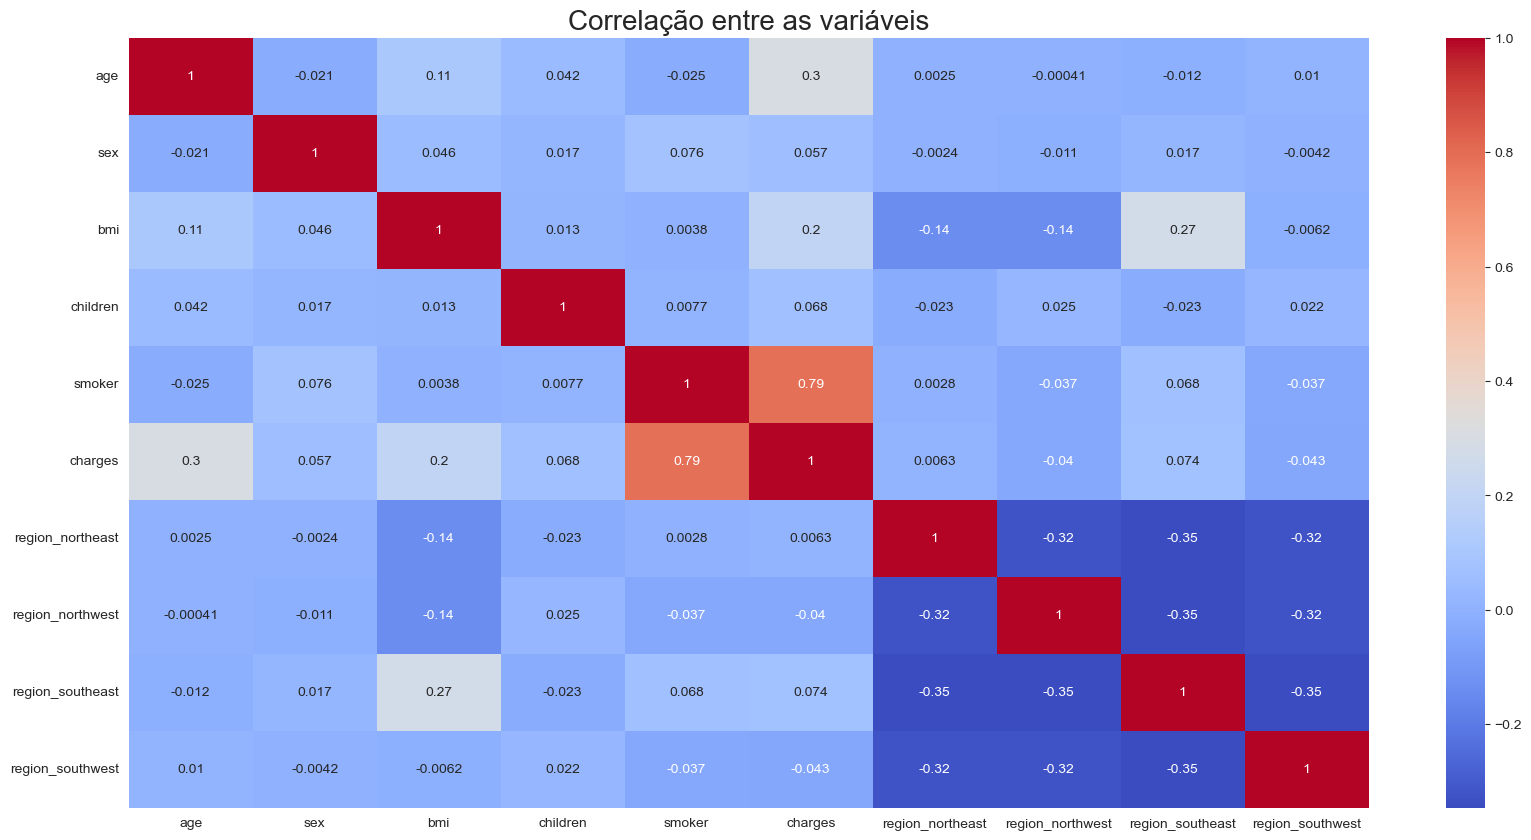

In [16]:
corr = dados.corr(method='spearman')

plt.figure(figsize = (20,10))
sns.heatmap(dados.corr(),annot=True , cmap ='coolwarm' )
plt.title("Correlação entre as variáveis", size = 20)
plt.show()

Inicialmente vemos variáveis que as variáveis das regiões são fracamente correlacionadas entre si o que deve ser investigado pois pode levar a problemas de multicolinearidade. Para melhor visualizar a correlação entre as variáveis independentes e a variável dependente, podemos optar por um gráfico de barras.

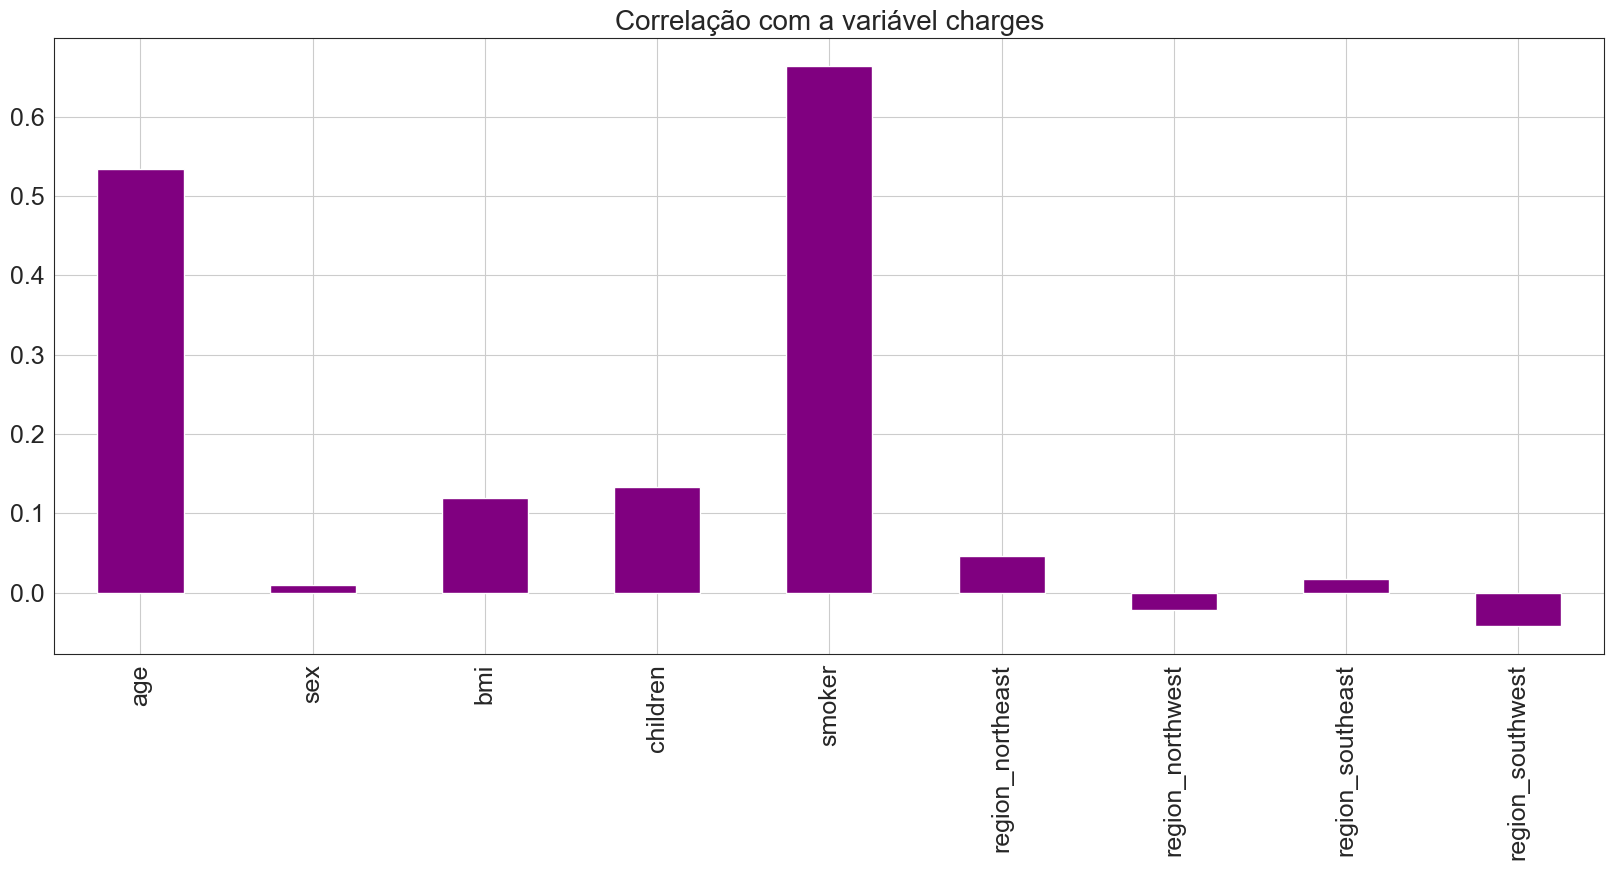

In [17]:
ax = dados.drop('charges', axis = 1).corrwith(dados.charges, method = 'spearman').plot(kind='bar', grid=True, figsize=(20, 8)
, color="Purple", fontsize = 18)

ax.set_title('Correlação com a variável charges', fontsize = 20)

plt.show()

Por esse gráfico fica claro que a variável 'smoker' é a mais correlacionada com charges enquanto as variáveis sex e as relacionadas as regiões possuem a menor correlação.

## Transformando a variável dependente

Como discutido anteriormente, as variáveis 'charges', age e bmi não possuem distribuição normal e por isso vamos optar por realizar uma transformação logarítmica nessas variáveis.

In [18]:
dados['log_charges'] = np.log(dados['charges'])
dados['log_age'] = np.log(dados['age'])
dados['log_bmi'] = np.log(dados['bmi'])

 Finalizada as análises preliminares vamos avançar para a separação dos datasets em treino e teste.

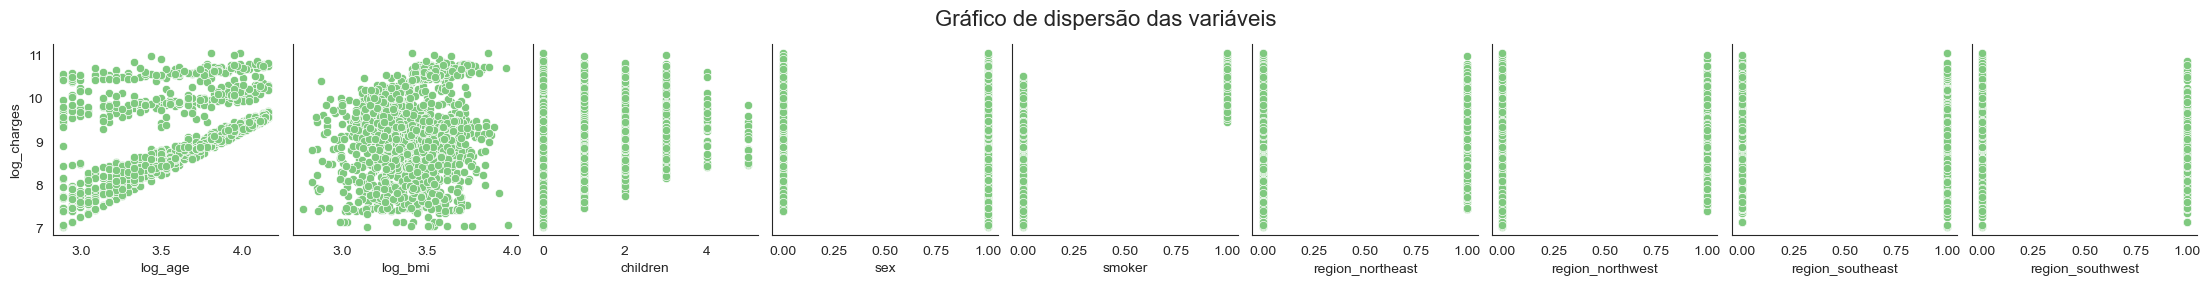

In [19]:
ax = sns.pairplot(data = dados, y_vars = 'log_charges', x_vars = ['log_age', 'log_bmi', 'children', 'sex', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], height = 2.5)
ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize = 16, y = 1.1)
plt.show()

A relação linear com log_age e children estão mais claras pós transformação. Smoker mantém o mesmo padrão anterior assim como sex, bmi e as variáveis relacionadas a region.

O próximo passao é separar a base de dados em treino e teste e treinar o modelo.

# <font color='red' style='font-size: 30px;'>Construindo os modelos</font>
<hr style='border: 2px solid red;'>

### Separando os datasets

In [20]:
X = dados.drop(['log_charges', 'charges', 'bmi', 'age'], axis = 1)
y = dados['log_charges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Estimando o modelo com statsmodels

Inicialmente vamos estimar o modelo com o statsmodels pois estamos interessados nos teste F e teste T para verificar se o modelo é estaticamente significativo ou se precisamos fazer alguma modificação. 
    Para o teste F devemos verificar se a $p \leq 0.05$ se a resposta for sim então nosso modelo, como um todo, é significativo estatisticamente. Já para o teste T devemos verificar se $p\leq 0.05 $ para as variáveis explicativas (uma a uma) e se a respostar for sim então aquela determinada variável é significativa para o modelo. Após essa verificação iremos estimar o modelo via scikit-learn.

In [22]:
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()


In [23]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     406.5
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          3.73e-307
Time:                        19:08:02   Log-Likelihood:                -606.68
No. Observations:                1003   AIC:                             1231.
Df Residuals:                     994   BIC:                             1276.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1737      0.214  

Apesar de obtermos um R² = 0.764 o que é significa que nosso modelo explica em 76.6% a variação dos dados ao redor da sua média também encontramos que o do modelo possui significância estatística, porém vemos um aviso de possível multicolinearidade e vamos investigar esse ponto agora.

Para investigar essa possível multicolinearidade vamos recorrer ao VIF (Variance Inflation Factor) que é uma métrica utilizada para detectar a presença de multicolinearidade entre variáveis independentes em um modelo de regressão. O VIF mede o quanto a variância de um coeficiente de regressão está inflada devido à correlação com outras variáveis no modelo. Um VIF alto indica que a variável está altamente correlacionada com outras, e isso pode prejudicar a interpretação do modelo. Para essa métrica temos:

- VIF = 1: Não há correlação entre uma variáve j e as outras variáveis independentes.
- 1 < VIF < 5: Indica uma correlação moderada, geralmente aceitável.
- VIF > 5 ou VIF > 10: Indica uma alta correlação entre a variável  j e as outras variáveis, sugerindo multicolinearidade severa.

Quando o VIF é elevado, é comum considerar a remoção ou transformação de variáveis para melhorar a qualidade do modelo.

Para o nosso caso temos:

In [24]:
vif = pd.DataFrame()

explicativas = ['log_age', 'sex', 'log_bmi', 'children', 'smoker','region_northeast', 'region_northwest', 'region_southeast','region_southwest']

vif = pd.DataFrame()

vif['Variável'] = explicativas
vif['VIF'] = [variance_inflation_factor(X_train[explicativas], i) for i in range(len(explicativas))]
vif

,Variável,VIF
0,log_age,1.026887
1,sex,1.005181
2,log_bmi,1.082477
3,children,1.013683
4,smoker,1.008253
5,region_northeast,89.111297
6,region_northwest,88.440148
7,region_southeast,97.686747
8,region_southwest,90.552099


Vemos então que as variáveis relacionadas a 'region' possuem VIF > 5 e portanto devemos remover as mesmas.

### Estimando o modelo com sckit-learn

Após a análise do primeiro modelo de regressão utilizando o statsmodels vamos partir para criação do modelo usando o sckit-learn.

In [25]:
X = dados.drop(['log_charges', 'charges', 'region_northeast', 'region_northwest', 
                'region_southeast', 'region_southwest', 'bmi', 'age'], axis = 1)
y = dados['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

y_previsto = modelo.predict(X_test)

print(f'R² do treino = {modelo.score(X_train, y_train):.3f}')

print(f'R² do teste = {metrics.r2_score(y_test, y_previsto):.3f}')

R² do treino = 0.762
R² do teste = 0.772


Temos que nosso modelo explica 77.2% da variação dos dados ao redor da sua média o que é um bom valor para nosso modelo. Apesar disso, é preciso verificar se o mesmo satisfaz as hipóteses da regressão linear e é portanto válido.

A outra métrica que iremos analisar o RMSE. Para essa métrica o ideal é que ela tenha o menor valor possível.

In [27]:
rmse_linear = mean_squared_error(np.exp(y_test),np.exp(y_previsto), squared = False)

print(f'RMSE: {rmse_linear:.2f}')

RMSE: 7215.69


### Validação cruzada

Para um resultado mais robusto vamos realizar a validação cruzada:

In [28]:
kf = KFold(n_splits = 15, shuffle=True, random_state = 5)
modelo = LinearRegression()
resultado_linear = cross_val_score(modelo, X, y, cv = kf, scoring = 'r2')

print(f'R²: {abs(resultado_linear.mean())}')

R²: 0.7557993376995931


## Avaliando a Regressão Linear Múltipla com Statsmodels
Para validar o modelo, precisamos verificar algumas suposições do modelo de regressão linear. As suposições comuns para o modelo de regressão linear são as seguintes:

1. Relação linear entre variáveis independentes e dependentes.
2. Sem presença de outliers na análise dos resíduos.
3. Passar no teste de homocedasticidade.
4. Resíduos normalmente distribuídos com média 0 e variância constante.
5. Ausência de multicolinearidade e autocorrelação.

In [29]:
regressao = smf.ols('y ~ X', data = dados).fit()

residuos = regressao.resid

### 1. Relação linear entre as variáveis independentes e dependentes

In [30]:
dados['previsao'] = regressao.fittedvalues

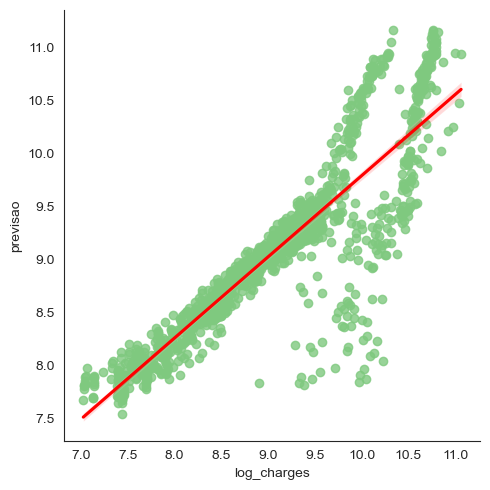

In [31]:
sns.lmplot(x = 'log_charges', y = 'previsao' , data = dados, line_kws = {'color' : 'red'});

### 2. Sem presença de outliers na análise dos resíduos.


(Entre -3 e 3) -> sugerido pela literatura.

In [32]:
outliers = regressao.outlier_test()

print(f' Máximo: {outliers.max()[0]}')
print(f' Minimo: {outliers.min()[0]}')

 Máximo: 4.946575185725747
 Minimo: -2.070562688811647


### 3. Passar no teste de homocedasticidade.

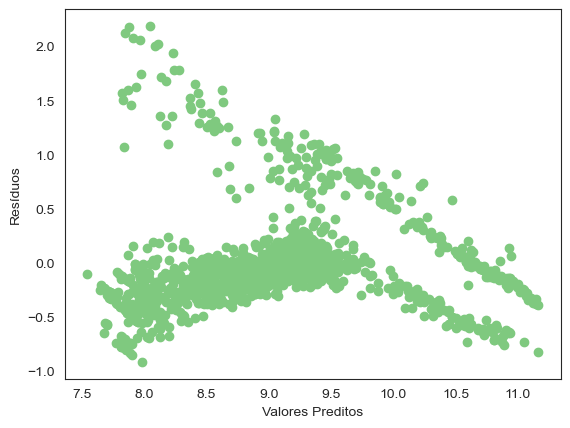

In [33]:
plt.scatter(y = residuos, x = regressao.predict())
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

$H_0$ = existe homocedasticidade : $p > 0.05$

$H_a$ = não existe homocedasticidade : $p \leq 0.05$

In [34]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 88.74136718072428
p-valor: 1.2349867299481151e-17
f-valor: 18.923783751322645
f_p-valor: 3.233525529036944e-18


### 4. Resíduos normalmente distribuídos com média 0 e variância constante.

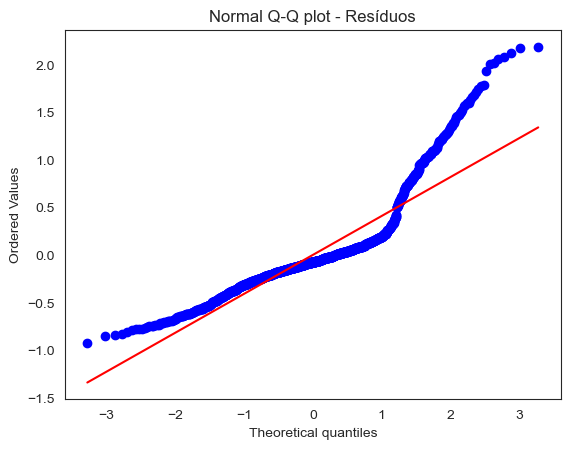

In [35]:
sp.probplot(residuos, dist="norm", plot = plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

$H_0$ = distribuição normal : $p > 0.05$

$H_a$ = distribuição $\neq$ normal : $p \leq 0.05$

In [36]:
estatistica, p = sp.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.833856999874115
p-valor: 3.550017907258826e-35


### 5. Ausência de multicolinearidade e autocorrelação.

VIF > 5 = possui multicolinearidade


In [37]:
VIF = 1/(1 - regressao.rsquared)
VIF

4.250273891995851

Vemos que nosso modelo **não é consistente** pois:
 1. Não possui uma relação linear entre variáveis independentes e dependentes.
 2. Há presença de outliers nos resíduos.
 3. Há heterocedasticidade nos resíduos.
 4. Resíduos não estão distríbuidos normalmente.
 
O único teste que o modelo passa é o da multicolinearidade. Portanto, vamos em busca de outros modelo de regressão.

## REGRESSÃO POR VETORES DE SUPORTE


In [38]:
X = dados.drop(['log_charges', 'charges', 'region_northeast', 'region_northwest', 
                'region_southeast', 'region_southwest', 'bmi', 'age', 'previsao'], axis = 1)
y = dados['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [39]:
svr = SVR(kernel = 'rbf')

svr.fit(X_train, y_train)

print(f'R² do treino = {svr.score(X_train, y_train):.3f}')

print(f'R² do teste = {svr.score(X_test, y_test):.3f}')

R² do treino = 0.804
R² do teste = 0.801


## Otimização de hiperparâmetros

In [40]:
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

grid_search_svr = GridSearchCV(svr, param_grid, scoring = 'r2', cv = 5, n_jobs = -1)

grid_search_svr.fit(X_train, y_train)

svr_otimizado = grid_search_svr.best_estimator_

print(f'Os melhores parâmetros: {grid_search_svr.best_params_}')

Os melhores parâmetros: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


### Validação cruzada

In [41]:
kf = KFold(n_splits = 15, shuffle=True, random_state = 5)

resultado_svr = cross_validate(svr_otimizado, X, y, scoring='r2', cv = kf)

resultado_svr = resultado_svr['test_score']

print(f'R²: {resultado_svr.mean()}')

R²: 0.8213398268935583


In [42]:
y_prev_svr = svr_otimizado.predict(X_test)

rmse_svr = mean_squared_error(np.exp(y_test), np.exp(y_prev_svr), squared = False)

print(f'RMSE: {rmse_svr:.2f}')

RMSE: 4778.76


## REGRESSÃO COM ÁRVORE DE DECISÃO

In [43]:
dtr = DecisionTreeRegressor(max_depth = 5, random_state = 42)

dtr.fit(X_train, y_train)

print(f'R² do treino = {dtr.score(X_train, y_train):.3f}')

print(f'R² do teste = {dtr.score(X_test, y_test):.3f}')

R² do treino = 0.848
R² do teste = 0.822


## Otimização de hiperparâmetros

In [44]:
param_grid = {
    'max_depth': [6, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'max_leaf_nodes': [None, 100, 500]
}

grid_search_dtr = GridSearchCV(dtr, param_grid, scoring = 'r2', cv = 5, n_jobs = -1)

grid_search_dtr.fit(X_train, y_train)

dtr_otimizado = grid_search_dtr.best_estimator_

print(f'Os melhores parâmetros: {grid_search_dtr.best_params_}')

Os melhores parâmetros: {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


### Validação cruzada

In [45]:
kf = KFold(n_splits = 15, shuffle = True, random_state = 5)

resultado_dtr = cross_validate(dtr_otimizado, X, y, scoring='r2', cv = kf)

resultado_dtr = resultado_dtr['test_score']

print(f'R²: {abs(resultado_dtr.mean())}')

R²: 0.8228477706957715


In [46]:
y_prev_dtr = dtr_otimizado.predict(X_test)

rmse_dtr = mean_squared_error(np.exp(y_test), np.exp(y_prev_dtr), squared = False)

print(f'RMSE: {rmse_dtr:.2f}')

RMSE: 4671.31


## REGRESSÃO COM RANDOM FOREST

In [47]:
rfr = RandomForestRegressor(max_depth = 5, random_state = 42)

rfr.fit(X_train, y_train)

y_prev_rfr = rfr.predict(X_test)

print(f'R² do treino = {rfr.score(X_train, y_train):.3f}')

print(f'R² do teste = {metrics.r2_score(y_test, y_prev_rfr):.3f}')

R² do treino = 0.858
R² do teste = 0.826


## Otimização de hiperparâmetros

In [48]:
param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'max_leaf_nodes': [None, 100, 500],
    'n_estimators': [50, 100, 200]
}

grid_search_rfr = GridSearchCV(rfr, param_grid, scoring = 'r2', cv = 5, n_jobs = -1)

grid_search_rfr.fit(X_train, y_train)

rfr_otimizado = grid_search_rfr.best_estimator_

print(f'Os melhores parâmetros: {grid_search_rfr.best_params_}')

Os melhores parâmetros: {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}


### Validação cruzada

In [49]:
kf = KFold(n_splits = 15, shuffle = True, random_state = 5)

resultado_rfr = cross_validate(rfr_otimizado, X, y, scoring='r2', cv = kf)

resultado_rfr = resultado_rfr['test_score']

print(f'R²: {resultado_rfr.mean()}')

R²: 0.8302207689579147


In [50]:
y_prev_rfr = rfr_otimizado.predict(X_test)

rmse_rfr = mean_squared_error(np.exp(y_test), np.exp(y_prev_rfr), squared = False)

print(f'RMSE: {rmse_rfr:.2f}')

RMSE: 4560.13


## REGRESSÃO COM XGBOOST

In [51]:
xgr = XGBRegressor(objective="reg:squarederror", random_state = 42)

xgr.fit(X_train, y_train)

y_prev_xgr = xgr.predict(X_test)

print(f'R² do treino = {xgr.score(X_train, y_train):.3f}')

print(f'R² do teste = {metrics.r2_score(y_test, y_prev_xgr):.3f}')

R² do treino = 0.992
R² do teste = 0.776


## Otimização de hiperparâmetros

In [52]:
param_grid = {
    'n_estimators': [100, 180, 250],
    'max_depth': [3, 5, 8, 10],
    'learning_rate': [0.05, 0.1, 0.3]
}

grid_search_xgr = GridSearchCV(xgr, param_grid, scoring = 'r2', cv = 5, n_jobs = -1)

grid_search_xgr.fit(X_train, y_train)

xgr_otimizado = grid_search_xgr.best_estimator_

print(f'Os melhores parâmetros: {grid_search_xgr.best_params_}')

Os melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


### Validação cruzada 

In [53]:
kf = KFold(n_splits = 15, shuffle = True, random_state = 5)

resultado_xgr = cross_validate(xgr_otimizado, X, y, scoring='r2', cv = kf)

resultado_xgr = resultado_xgr['test_score']

print(f'R²: {resultado_xgr.mean()}')

R²: 0.833074357357758


In [54]:
y_prev_xgr = xgr_otimizado.predict(X_test)

rmse_xgr = mean_squared_error(np.exp(y_test), np.exp(y_prev_xgr), squared = False)

print(f'RMSE: {rmse_xgr:.2f}')

RMSE: 4478.83


## REGRESSÃO COM LIGHT GBM

In [55]:
lgbm = lgb.LGBMRegressor(random_state = 42)

lgbm.fit(X_train, y_train)

y_prev_lgbm = lgbm.predict(X_test)

print(f'R² do treino = {lgbm.score(X_train, y_train):.3f}')

print(f'R² do teste = {metrics.r2_score(y_test, y_prev_lgbm):.3f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 5
[LightGBM] [Info] Start training from score 9.102481
R² do treino = 0.922
R² do teste = 0.807


## Otimização de hiperparâmetros

In [56]:
param_grid = {
    'num_leaves' : [50, 100, 150], 
    'max_depth' : [3, 5, 8], 
    'learning_rate' : [0.01, 0.1, 0.5], 
    'n_estimators' : [50, 100, 150],
}

grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring = 'r2', cv = 5, n_jobs = -1, verbose = False)

grid_search_lgbm.fit(X_train, y_train)

lgbm_otimizado = grid_search_lgbm.best_estimator_

print(f'Os melhores parâmetros: {grid_search_lgbm.best_params_}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 5
[LightGBM] [Info] Start training from score 9.102481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## Validação cruzada

In [57]:
kf = KFold(n_splits = 15, shuffle = True, random_state = 5)

resultado_lgbm = cross_validate(lgbm_otimizado, X, y, scoring='r2', cv = kf)

resultado_lgbm = resultado_lgbm['test_score']

print(f'R²: {resultado_lgbm.mean()}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 5
[LightGBM] [Info] Start training from score 9.108056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 1249, number of used features: 5
[LightGBM] [Info] Start training from score 9.102678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 1249, number of used features: 5
[LightGBM] [Info] Start training from score 9.103421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [58]:
y_prev_lgbm = lgbm_otimizado.predict(X_test)

rmse_lgbm = mean_squared_error(np.exp(y_test), np.exp(y_prev_lgbm), squared = False)

print(f'RMSE: {rmse_lgbm:.2f}')

RMSE: 4496.99


## REGRESSÃO COM CATBOOST

In [59]:
cat = CatBoostRegressor (random_state = 42)

cat.fit(X_train, y_train, verbose = False)

y_prev_cat = cat.predict(X_test)

print(f'R² do treino = {rfr.score(X_train, y_train):.3f}')

print(f'R² do teste = {metrics.r2_score(y_test, y_prev_cat):.3f}')

R² do treino = 0.858
R² do teste = 0.811


## Otimização de hiperparâmetros

In [60]:
param_grid = {
    'iterations' : [50, 100, 150], 
    'depth' : [3, 5, 8], 
    'learning_rate' : [0.01, 0.08, 0.1]
}

grid_search_cat = GridSearchCV(cat, param_grid, scoring = 'r2', cv = 5, n_jobs = -1)

grid_search_cat.fit(X_train, y_train, verbose = False)

cat_otimizado = grid_search_cat.best_estimator_

print(f'Os melhores parâmetros: {grid_search_cat.best_params_}')

Os melhores parâmetros: {'depth': 5, 'iterations': 50, 'learning_rate': 0.1}


### Validação cruzada

In [61]:
kf = KFold(n_splits = 15, shuffle = True, random_state = 5)

resultado_cat = cross_validate(cat_otimizado, X, y, scoring='r2', cv = kf, verbose = False)

resultado_cat = resultado_cat['test_score']

print(f'R²: {resultado_cat.mean()}')

0:	learn: 0.8510339	total: 1.58ms	remaining: 77.6ms
1:	learn: 0.7921332	total: 3.3ms	remaining: 79.3ms
2:	learn: 0.7389320	total: 5.22ms	remaining: 81.8ms
3:	learn: 0.6911604	total: 6.98ms	remaining: 80.3ms
4:	learn: 0.6539930	total: 8.69ms	remaining: 78.2ms
5:	learn: 0.6173732	total: 10.2ms	remaining: 74.9ms
6:	learn: 0.5854636	total: 11.9ms	remaining: 73.4ms
7:	learn: 0.5549744	total: 13.6ms	remaining: 71.3ms
8:	learn: 0.5310346	total: 15ms	remaining: 68.4ms
9:	learn: 0.5082228	total: 16.8ms	remaining: 67.3ms
10:	learn: 0.4893214	total: 18.5ms	remaining: 65.7ms
11:	learn: 0.4747840	total: 19.6ms	remaining: 62.2ms
12:	learn: 0.4585967	total: 21.6ms	remaining: 61.5ms
13:	learn: 0.4448872	total: 23.3ms	remaining: 59.9ms
14:	learn: 0.4345316	total: 24.9ms	remaining: 58.1ms
15:	learn: 0.4247515	total: 26.8ms	remaining: 56.9ms
16:	learn: 0.4157123	total: 28.5ms	remaining: 55.2ms
17:	learn: 0.4085453	total: 30.2ms	remaining: 53.7ms
18:	learn: 0.4017286	total: 31.9ms	remaining: 52.1ms
19:	le

0:	learn: 0.8597719	total: 1.41ms	remaining: 68.9ms
1:	learn: 0.8016522	total: 3.98ms	remaining: 95.5ms
2:	learn: 0.7510600	total: 6.61ms	remaining: 104ms
3:	learn: 0.7020206	total: 8.2ms	remaining: 94.3ms
4:	learn: 0.6639148	total: 9.76ms	remaining: 87.8ms
5:	learn: 0.6263030	total: 11.3ms	remaining: 82.6ms
6:	learn: 0.5934074	total: 12.7ms	remaining: 77.9ms
7:	learn: 0.5620920	total: 14.1ms	remaining: 73.8ms
8:	learn: 0.5375245	total: 15.7ms	remaining: 71.6ms
9:	learn: 0.5140346	total: 17.5ms	remaining: 70.1ms
10:	learn: 0.4945872	total: 19.2ms	remaining: 68ms
11:	learn: 0.4799609	total: 20.1ms	remaining: 63.7ms
12:	learn: 0.4633760	total: 21.8ms	remaining: 61.9ms
13:	learn: 0.4491235	total: 23.4ms	remaining: 60.2ms
14:	learn: 0.4382169	total: 25.1ms	remaining: 58.5ms
15:	learn: 0.4277033	total: 26.5ms	remaining: 56.4ms
16:	learn: 0.4181817	total: 28.1ms	remaining: 54.6ms
17:	learn: 0.4107639	total: 29.9ms	remaining: 53.1ms
18:	learn: 0.4039754	total: 31.6ms	remaining: 51.5ms
19:	lea

34:	learn: 0.3507915	total: 70.3ms	remaining: 30.1ms
35:	learn: 0.3500984	total: 72.6ms	remaining: 28.2ms
36:	learn: 0.3492921	total: 74.4ms	remaining: 26.1ms
37:	learn: 0.3486468	total: 76.3ms	remaining: 24.1ms
38:	learn: 0.3480113	total: 78.2ms	remaining: 22.1ms
39:	learn: 0.3469868	total: 80.5ms	remaining: 20.1ms
40:	learn: 0.3467131	total: 82ms	remaining: 18ms
41:	learn: 0.3463730	total: 83.7ms	remaining: 15.9ms
42:	learn: 0.3455492	total: 85.3ms	remaining: 13.9ms
43:	learn: 0.3452377	total: 87.2ms	remaining: 11.9ms
44:	learn: 0.3446809	total: 89ms	remaining: 9.89ms
45:	learn: 0.3437495	total: 90.8ms	remaining: 7.89ms
46:	learn: 0.3435444	total: 92.3ms	remaining: 5.89ms
47:	learn: 0.3429039	total: 94ms	remaining: 3.92ms
48:	learn: 0.3425469	total: 95.5ms	remaining: 1.95ms
49:	learn: 0.3421699	total: 97.3ms	remaining: 0us
0:	learn: 0.8568054	total: 1.6ms	remaining: 78.7ms
1:	learn: 0.7974360	total: 3.14ms	remaining: 75.4ms
2:	learn: 0.7474154	total: 4.63ms	remaining: 72.5ms
3:	learn

30:	learn: 0.3639208	total: 51ms	remaining: 31.3ms
31:	learn: 0.3629057	total: 53.2ms	remaining: 29.9ms
32:	learn: 0.3618994	total: 55ms	remaining: 28.3ms
33:	learn: 0.3609294	total: 56.6ms	remaining: 26.6ms
34:	learn: 0.3600840	total: 58.4ms	remaining: 25ms
35:	learn: 0.3594918	total: 60.3ms	remaining: 23.4ms
36:	learn: 0.3585854	total: 62.1ms	remaining: 21.8ms
37:	learn: 0.3580523	total: 63.7ms	remaining: 20.1ms
38:	learn: 0.3576400	total: 65.3ms	remaining: 18.4ms
39:	learn: 0.3570535	total: 67.1ms	remaining: 16.8ms
40:	learn: 0.3568694	total: 68.5ms	remaining: 15ms
41:	learn: 0.3566557	total: 70.1ms	remaining: 13.3ms
42:	learn: 0.3559830	total: 71.6ms	remaining: 11.7ms
43:	learn: 0.3556925	total: 73.3ms	remaining: 10ms
44:	learn: 0.3552567	total: 74.9ms	remaining: 8.33ms
45:	learn: 0.3548611	total: 77.4ms	remaining: 6.73ms
46:	learn: 0.3546553	total: 79.3ms	remaining: 5.06ms
47:	learn: 0.3542187	total: 81.1ms	remaining: 3.38ms
48:	learn: 0.3539304	total: 82.9ms	remaining: 1.69ms
49:

In [62]:
y_prev_cat = cat_otimizado.predict(X_test)

rmse_cat = mean_squared_error(np.exp(y_test), np.exp(y_prev_cat), squared = False)

print(f'RMSE: {rmse_cat:.2f}')

RMSE: 4531.21


Após o erro e otimização de todos os modelos construímos a seguinte tabela:

In [63]:
modelos_regressao = pd.DataFrame(
{
    'Modelos' : ['Regressão linear', 'SVR', 'Árvore de Decisão', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'],
    'R²' :[resultado_linear.mean(), resultado_svr.mean(), resultado_dtr.mean(), resultado_rfr.mean(), resultado_xgr.mean(), resultado_lgbm.mean(), resultado_cat.mean()],
    'RMSE': [rmse_linear, rmse_svr, rmse_dtr, rmse_rfr, rmse_xgr, rmse_lgbm, rmse_cat]
    
})

modelos_regressao.sort_values('RMSE', inplace = True)

modelos_regressao.reset_index(inplace = True, drop = True)

modelos_regressao

,Modelos,R²,RMSE
0,XGBoost,0.833074,4478.833133
1,LightGBM,0.833487,4496.986666
2,CatBoost,0.830842,4531.205806
3,Random Forest,0.830221,4560.134255
4,Árvore de Decisão,0.822848,4671.311828
5,SVR,0.821340,4778.761041
6,Regressão linear,0.755799,7215.689040


# <font color='red' style='font-size: 30px;'>Conclusão</font>
<hr style='border: 2px solid red;'>

 Neste projeto, foram aplicadas técnicas de regressão para previsão do valor de seguros. Após uma breve análise exploratória de dados foi feita uma regressão linear e verificado que o modelo não era confiável, pois não seguia os pressupostos de uma regressão linear, apesar do valor de R² razoável. Com isso, foram treinado diferentes modelos de regressão como árvores de decisão, LightGBM e XGBoost. O modelo XGBoost apresentou os melhores resultados e após a otimização de hiperparâmetros alcançou um R² = 0.83 e RMSE = 4478.8.